In [34]:
import pandas as pd
import seaborn as sns


#### READING THE FILE

In [35]:
df=pd.read_csv('SPAM FILE.csv',encoding='latin-1')
df.head(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [36]:
df.shape

(5572, 5)

In [37]:
data=df.copy()

#### DROPING THESE THREE UNNAMED COLUMNS WHICH ARE OF NO USE


In [38]:
data.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1,inplace=True)
data

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [39]:
col=['LABEL','MESSAGE']
data.columns=col
data.columns

Index(['LABEL', 'MESSAGE'], dtype='object')

#### MAKING LENGTH COLUMN

In [40]:
data['LENGTH']=data['MESSAGE'].apply(lambda x: len(x))
data

,LABEL,MESSAGE,LENGTH
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,161
5568,ham,Will Ì_ b going to esplanade fr home?,37
5569,ham,"Pity, * was in mood for that. So...any other s...",57
5570,ham,The guy did some bitching but I acted like i'd...,125


#### VISUALIZING THE LENGTH COLUMN

<AxesSubplot:xlabel='LENGTH', ylabel='Count'>

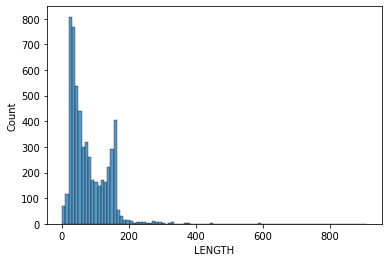

In [41]:
sns.histplot(x=data['LENGTH'])

#### USING DESCRIBE OPTION ON LENGTH COLUMN 

In [42]:
data['LENGTH'].describe()

count    5572.000000
mean       80.118808
std        59.690841
min         2.000000
25%        36.000000
50%        61.000000
75%       121.000000
max       910.000000
Name: LENGTH, dtype: float64

#### INSTALLING NLTK LIBRARY

In [22]:
!pip install nltk

     ---------------------------------------- 1.5/1.5 MB 2.8 MB/s eta 0:00:00
     -------------------------------------- 262.0/262.0 KB 2.7 MB/s eta 0:00:00
     ---------------------------------------- 78.4/78.4 KB 1.5 MB/s eta 0:00:00
     ---------------------------------------- 96.6/96.6 KB 1.8 MB/s eta 0:00:00


You should consider upgrading via the 'C:\Users\ps109\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


#### DOWNLOADING STOPWORDS

In [43]:
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ps109\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [44]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

#### ANLAYSING PUNCTUATIONS WHICH HAS TO BE REMOVED

In [45]:
import string
[punc for punc in string.punctuation]

['!',
 '"',
 '#',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '.',
 '/',
 ':',
 ';',
 '<',
 '=',
 '>',
 '?',
 '@',
 '[',
 '\\',
 ']',
 '^',
 '_',
 '`',
 '{',
 '|',
 '}',
 '~']

#### DEFINING A FUNCTION WHOSE MAIN OBJECTIVE IS TO REMOVE STOP WORDS AND PUNCTUATIONS FROM MESSAGES

In [46]:
def text_process(msg):
    nopunc =[char for char in msg if char not in string.punctuation]
    nopunc=''.join(nopunc)
    return ' '.join([word for word in nopunc.split() if word.lower() not in stopwords.words('english')])

#### CREATING TWO COLUMNS

In [47]:
data["UPDATED MSG"]=data['MESSAGE'].apply(lambda x: text_process(x))
data['UPDATED LENGTH']=data['UPDATED MSG'].apply(lambda x: len(x))

In [48]:
data

,LABEL,MESSAGE,LENGTH,UPDATED MSG,UPDATED LENGTH
0,ham,"Go until jurong point, crazy.. Available only ...",111,Go jurong point crazy Available bugis n great ...,82
1,ham,Ok lar... Joking wif u oni...,29,Ok lar Joking wif u oni,23
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,Free entry 2 wkly comp win FA Cup final tkts 2...,135
3,ham,U dun say so early hor... U c already then say...,49,U dun say early hor U c already say,35
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,Nah dont think goes usf lives around though,43
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,161,2nd time tried 2 contact u U å£750 Pound prize...,112
5568,ham,Will Ì_ b going to esplanade fr home?,37,Ì b going esplanade fr home,27
5569,ham,"Pity, * was in mood for that. So...any other s...",57,Pity mood Soany suggestions,27
5570,ham,The guy did some bitching but I acted like i'd...,125,guy bitching acted like id interested buying s...,82


#### MAKING A COPY OF DATASET

In [49]:
dx=data.copy()
dx.drop(['MESSAGE','LENGTH'],axis=1,inplace=True)
dx

,LABEL,UPDATED MSG,UPDATED LENGTH
0,ham,Go jurong point crazy Available bugis n great ...,82
1,ham,Ok lar Joking wif u oni,23
2,spam,Free entry 2 wkly comp win FA Cup final tkts 2...,135
3,ham,U dun say early hor U c already say,35
4,ham,Nah dont think goes usf lives around though,43
...,...,...,...
5567,spam,2nd time tried 2 contact u U å£750 Pound prize...,112
5568,ham,Ì b going esplanade fr home,27
5569,ham,Pity mood Soany suggestions,27
5570,ham,guy bitching acted like id interested buying s...,82


#### IMPORTING TRAIN_TEST_SPLIT MODULE

In [51]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(dx['UPDATED MSG'],dx['LABEL'],test_size=0.2,random_state=1)


#### IMPORTING COUNTVECTORIZER (in a sparse matrix format. Matrix that mostly contain zeroes are said to be sparse. Sparse matrices are commonly used in applied machine learning (such as in data containing data-encodings that map categories to count) and even in whole subfields of machine learning such as natural language processing (NLP). 
##### (It is used to transform a given text into a vector on the basis of the frequency (count) of each word that occurs in the entire text.)

In [62]:
from sklearn.feature_extraction.text import CountVectorizer
v= CountVectorizer()
x_train_count=v.fit_transform(x_train)
x_test_count=v.transform(x_test)

#### using toarray() 
##### Return a dense ndarray representation of this matrix

In [63]:
x_train1=x_train_count.toarray()
x_test1=x_test_count.toarray()

#### USING NAIVE BAYES (MULTINOMIAL N.B)

In [91]:
from sklearn.naive_bayes import MultinomialNB
NB=MultinomialNB()
model = NB.fit(x_train1,y_train)

#### CALCULATING ACCURACY SCORE

In [92]:
model.score(x_test1,y_test)

0.9865470852017937

#### TESTING THE MODEL

In [95]:
email = ["Hello George, how about a game of tennis tomorrow?",
         "Hello, click here if you want to satisfy your wife tonight",
         "We offer free viagra!!! Click here now!!!",
         "Dear Sara, I prepared the annual report. Please check the attachment.",
         "Hi David, will we go for cinema tonight?",
         "Best holidays offers only here!!!",
        "Hello Sam, can you click this link"]
email_count=v.transform(email)
email_pred=NB.predict(email_count.toarray())
print(email_pred)

['ham' 'ham' 'spam' 'ham' 'ham' 'spam' 'spam']


In [98]:
from sklearn.pipeline import Pipeline
clf1=Pipeline([('vectorizer',CountVectorizer()),
              ('nb',MultinomialNB())])
clf1.fit(x_train,y_train)

Pipeline(steps=[('vectorizer', CountVectorizer()), ('nb', MultinomialNB())])

In [85]:
clf1.predict(email)

array(['ham', 'ham', 'spam', 'ham', 'ham', 'spam', 'spam'], dtype='<U4')

#### USING NAIVE BAYES GAUSIIAN CLASSIFIER

In [94]:
from sklearn.naive_bayes import GaussianNB
nb2=GaussianNB()
model2=nb2.fit(x_train1,y_train)
model2.score(x_test1,y_test)

0.9022421524663677

#### TESTING THE GAUSSIAN MODEL 

In [100]:
email = ["Hello George, how about a game of tennis tomorrow?",
         "Hello, click here if you want to satisfy your wife tonight",
         "We offer free viagra!!! Click here now!!!",
         "Dear Sara, I prepared the annual report. Please check the attachment.",
         "Hi David, will we go for cinema tonight?",
         "Best holidays offers only here!!!",
        "Hello Sam, can you click this link"]
email_count=v.transform(email)
email_pred=nb2.predict(email_count.toarray())
print(email_pred)

['spam' 'spam' 'ham' 'ham' 'ham' 'spam' 'ham']
